In [ ]:
# !git clone https://github.com/PaddlePaddle/PaddleOCR

In [ ]:
!pip install paddleocr

In [ ]:
# !cd PaddleOCR && pip3 install -r requirements.txt

In [ ]:
# !pip install paddlepaddle

In [12]:
import os
import cv2
from matplotlib import pyplot as plt
from paddleocr import PaddleOCR, draw_ocr

ModuleNotFoundError: No module named 'paddleocr'

In [9]:
# Russian OCR model
ocr_ru = PaddleOCR(use_angle_cls=True, lang='ru') # need to run only once to download and load model into memory

NameError: name 'PaddleOCR' is not defined

In [ ]:
# English OCR model
ocr_en = PaddleOCR(use_angle_cls=True, lang='en')

In [11]:
img_path = './images/glicin_stable.jpg'
font_path = './PaddleOCR/doc/fonts/cyrillic.ttf'
result = ocr_en.ocr(img_path, cls=True)
for line in result:
    print(line)

# # Visualization
# from PIL import Image
# image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
texts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
# im_show = draw_ocr(image, boxes, texts, scores, font_path=font_path)
# im_show = Image.fromarray(im_show)
# im_show.save('result.jpg')

NameError: name 'ocr_en' is not defined

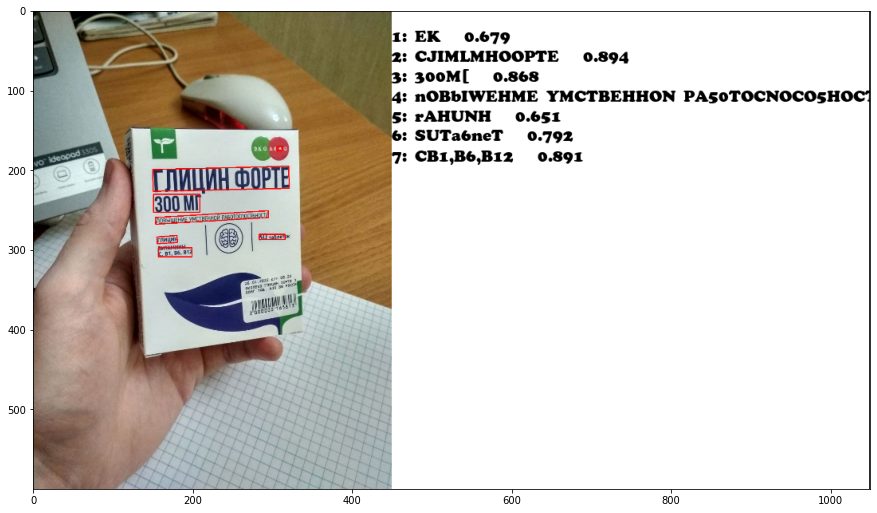

In [ ]:
# Visualization
img = cv2.imread(img_path) 
# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# resizing display area
plt.figure(figsize=(15,15))
# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 
# show the image using matplotlib
plt.imshow(annotated) 

In [ ]:
!pip install easyocr

In [ ]:
import easyocr
import numpy as np
reader_eng = easyocr.Reader(['en']) # this needs to run only once to load the model into memory

In [ ]:
reader_ru = easyocr.Reader(['ru'])

In [ ]:
reader_ru_eng = easyocr.Reader(['en', 'ru'])

In [ ]:
result_ru = reader_ru.readtext(img_path)
result_eng = reader_eng.readtext(img_path)
result_ru_eng = reader_ru_eng.readtext(img_path)

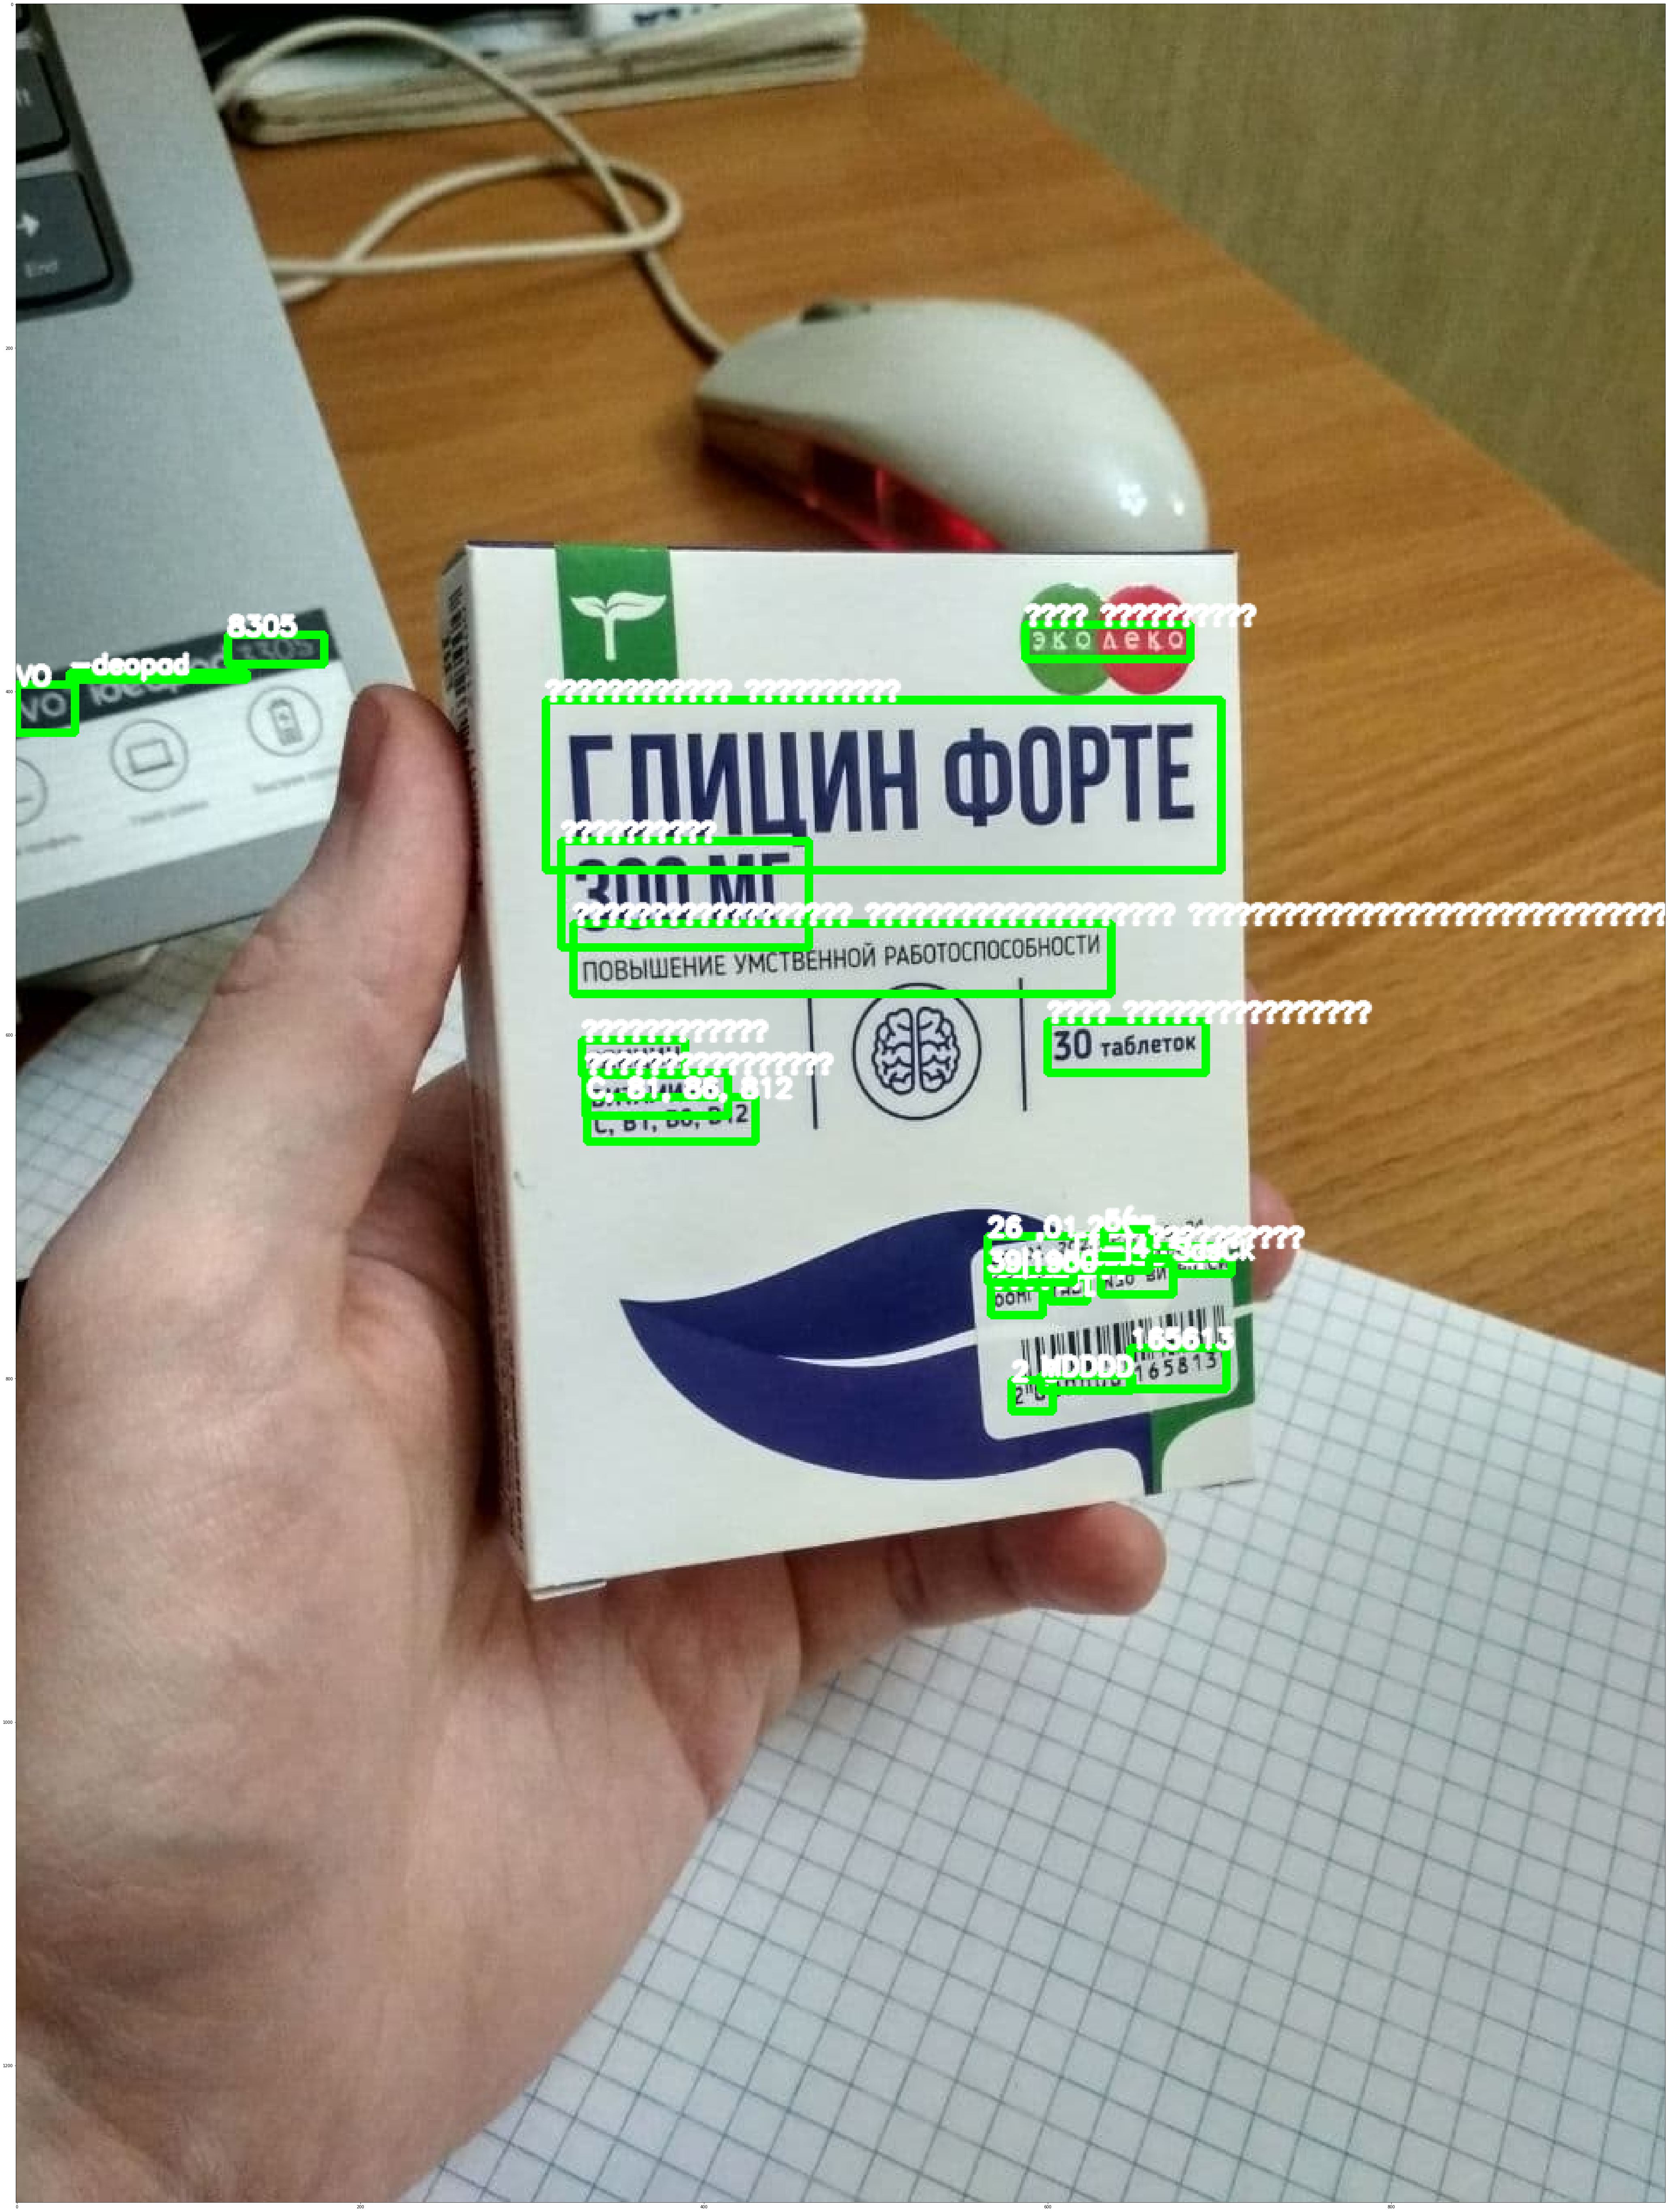

эк оАеко  ###  0.4608512049418191
VO  ###  0.26212316761747784
Глицин Форте  ###  0.7364991865418753
зооМГ  ###  0.368215657784088
повышение умственной работоспособности  ###  0.9532337187803173
Глицин  ###  0.8074732339663561
ЗО таблеток  ###  0.8119974113067362
витамины  ###  0.6602042675306267
C, 81, 86, 812  ###  0.3120113008642607
26 ,01.2033  ###  0.23736802883816546
м30 8|1  ###  0.0606736159341194
т9Б  ###  0.10923708815365493
ООй[  ###  0.11691471189260483
165613  ###  0.6594236335705125
2 0  ###  0.39572707501244303
8305  ###  0.09946570545434952
-deopad  ###  0.04238675198075862
5(-  ###  0.00864305948090475
повцй  ###  0.002716933569220579
[1-|4  ###  0.003430815636173996
SasCk  ###  0.013418977557654978
39|1950  ###  0.04734571496477171
MDDDD  ###  0.16576509034446185


In [ ]:
# result_ru[i][0]-bbox
# result_ru[i][1]-text
# result_ru[i][2]-prediction value
result = result_ru_eng
font = cv2.FONT_HERSHEY_SIMPLEX
# boxes = [line[0] for line in result]
# texts = [line[1] for line in result]
# scores = [line[2] for line in result]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(100,100))

for line in result:
  # print(line)
  top_left = tuple([int(i) for i in line[0][0]])
  bottom_right = tuple([int(i) for i in line[0][2]])
  text = line[1]
  score = line[2]
  # print(top_left, bottom_right, (0, 255,0))
  img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 3)
  img = cv2.putText(img, text, top_left, font, 0.5, (255,255,255), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

for line in result:
  print(line[1], " ### ",line[2])